# Image constructor module
2023 version, from original 2018 script to build a cartoon version of cell microscopy data given input csv with cell coordinates (x,y) and colors (RGB).
- buildcartoon04loads_200514.py
- buildcartoon04loads_N2Adailies.py

## Objective
- Read in data (as obtained from actual microscope images or from in silico generated data) and plot colored cells
- September 2023 testing what thresholding could look like to restrict already-obtained in vivo data to groups of cells with known lineage relationships (e.g. are only R/G/B and therefore may be or are certainly NOT related to one another)

## To do
- Ternary plots
- Handle a z coordinate or other metadata

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

Global variables

In [17]:
datafile = '/Users/ellendegenn/Dropbox (MIT)/Walsh Lab/slide imaging/Spring18 mouse dilutions - partially backed up/long survival/HCBI LSM880/436g/analysis/python output/436g_xyRGB.csv'
headers = ['xcoords', 'ycoords', 'R', 'G', 'B', 'imgsizex', 'imgsizey']

title = 'Mouse 436g, E14-P22'

Read in data

In [18]:
#open from
with open(datafile) as csvfile:
    table = pd.read_csv(csvfile)

#store in discrete arrays - could maybe make this a function
length = table.shape[0]

xcoords = []
for i in range(0,length):
    xcoords.append(table[headers[0]][i])

ycoords = []
for i in range(0,length):
    ycoords.append(table[headers[1]][i])

reds = []
for i in range(0,length):
    reds.append(table[headers[2]][i])

greens = []
for i in range(0,length):
    greens.append(table[headers[3]][i])

blues = []
for i in range(0,length):
    blues.append(table[headers[4]][i])

imgsizex = table[headers[5]][0]
imgsizey = table[headers[6]][0]

#combine colors into one array
colorpix = np.zeros((length, 3))
for i in range(0, length):
    colorpix[i] = [reds[i], greens[i], blues[i]]

Plot

In [19]:
xcs = []
ycs = []
plotcolors = []
for i in range(0,len(colorpix)):
    xcs.append((xcoords[i]))
    ycs.append((imgsizey-ycoords[i]))#need to flip for some reason
    plotcolors.append(colorpix[i])

In [20]:
#normalize rgb values to print on graph
normcolors = np.divide(plotcolors,255)

Text(0.5, 1.0, 'Mouse 436g, E14-P22')

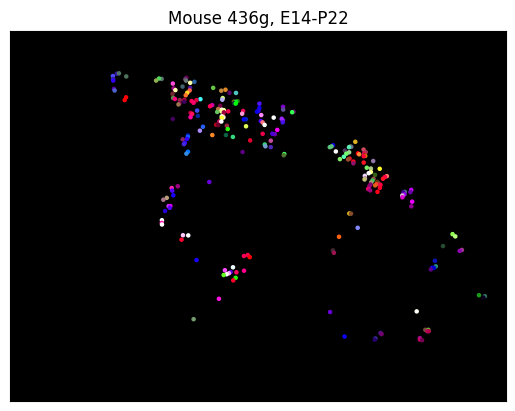

In [21]:
#in situ
situfig, ax2 = plt.subplots()
situdata = plt.scatter(xcs, ycs, c = normcolors, marker='o', s=5)
ax2.set_xlim([0,imgsizex])
ax2.set_ylim([0,imgsizey])
ax2.set_facecolor('black')
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_title(title)
#situfig.savefig(workdir+title+'_insitu.svg', dpi = 400, bbox_inches='tight')

In [22]:
normcolors

array([[0.20784314, 0.0745098 , 0.63529412],
       [0.30980392, 0.45882353, 0.39215686],
       [0.30980392, 0.29803922, 1.        ],
       [0.30980392, 0.45882353, 0.36862745],
       [0.40784314, 0.        , 0.34117647],
       [0.35686275, 0.45882353, 0.43529412],
       [0.20784314, 0.15294118, 0.58431373],
       [0.30980392, 0.84705882, 0.36862745],
       [0.40784314, 0.22352941, 0.41960784],
       [0.20784314, 0.        , 1.        ],
       [0.40784314, 0.45882353, 0.45882353],
       [0.56862745, 0.69411765, 0.31764706],
       [0.15294118, 0.38431373, 0.63529412],
       [0.98039216, 1.        , 0.6627451 ],
       [1.        , 0.29803922, 0.85490196],
       [0.25882353, 0.38431373, 0.43529412],
       [0.40784314, 0.77254902, 0.26666667],
       [0.30980392, 0.0745098 , 0.61176471],
       [0.35686275, 0.        , 0.71372549],
       [0.61960784, 0.        , 0.51372549],
       [1.        , 1.        , 0.68627451],
       [0.8745098 , 0.54117647, 0.14509804],
       [0.

In [31]:
normcolor_df = pd.DataFrame(normcolors, columns=['R','G','B'])

In [34]:
normcolor_df

,R,G,B
0,0.207843,0.074510,0.635294
1,0.309804,0.458824,0.392157
2,0.309804,0.298039,1.000000
3,0.309804,0.458824,0.368627
4,0.407843,0.000000,0.341176
...,...,...,...
246,0.568627,0.074510,0.541176
247,0.258824,0.223529,0.662745
248,0.772549,0.000000,0.419608
249,0.152941,0.000000,0.435294


In [46]:
normcolor_df[normcolor_df['G']<0.1]

,R,G,B
0,0.207843,0.07451,0.635294
4,0.407843,0.00000,0.341176
9,0.207843,0.00000,1.000000
17,0.309804,0.07451,0.611765
18,0.356863,0.00000,0.713725
...,...,...,...
245,0.050980,0.00000,1.000000
246,0.568627,0.07451,0.541176
248,0.772549,0.00000,0.419608
249,0.152941,0.00000,0.435294


Plot subset

In [ ]:
#in situ
fig, ax3 = plt.subplots()
situdata = plt.scatter(xcs, ycs, c = normcolors, marker='o', s=5) #need to change
ax3.set_xlim([0,imgsizex])
ax3.set_ylim([0,imgsizey])
ax3.set_facecolor('black')
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
#ax3.set_title(title)

Old code not needed below

In [6]:
hsvcolors = colors.rgb_to_hsv(normcolors)

#let's try setting the value for all to 80%
maxvalcolors = hsvcolors
maxvalcolors[:,1] = np.add(hsvcolors[:,1],0.2)#increase saturation for display
maxvalcolors[:,2] = (np.zeros(len(hsvcolors))+0.8)
maxvalrgbs = colors.hsv_to_rgb(maxvalcolors)

In [ ]:
#plot colors
colorfig, ax1 = plt.subplots()
colordata = plt.scatter(normcolors[:,0], normcolors[:,1], c = normcolors, marker='o', s=10)
ax1.set_xlim([0,0.65])
ax1.set_ylim([0,0.35])
ax1.set_xlabel('Red')
ax1.set_ylabel('Green')
#ax1.set_facecolor('black')
#ax1.xaxis.set_visible(False)
#ax1.yaxis.set_visible(False)
ax1.set_title(title)
#colorfig.savefig(workdir+title+'_colorplot.svg', dpi = 400, bbox_inches='tight')

/var/folders/zr/01bn2_6s6278yrsrb8g0wlxm0000gn/T/ipykernel_18024/1285374397.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs, ys, zs, c = normcolors, marker='o', s=50, depthshade=False, cmap='nipy_spectral')


<Figure size 640x480 with 0 Axes>

<Figure size 3840x2880 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

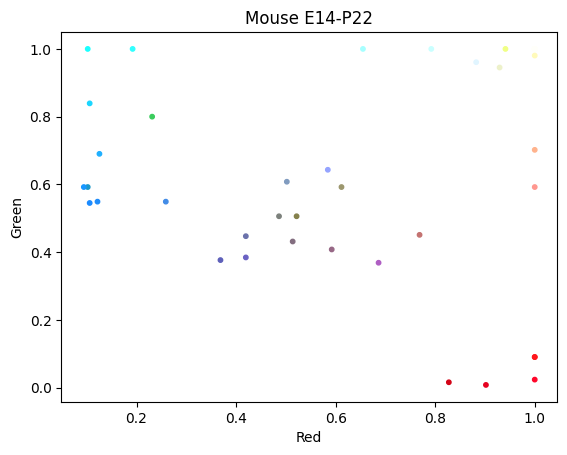

<Figure size 400x200 with 0 Axes>

In [7]:
#3d plot
#https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
 
xs = normcolors[:,0]
ys = normcolors[:,1]
zs = normcolors[:,2]

ax.scatter(xs, ys, zs, c = normcolors, marker='o', s=50, depthshade=False, cmap='nipy_spectral')
#ax.scatter(xs, ys, zs, c = normcolors, marker='o', s=10, depthshade=False)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())

ax.set_title(title)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.figure(dpi=600)
plt.show()

plt.scatter(xs, ys, c = normcolors, marker='o', s=10)
plt.title(title)
plt.xlabel('Red')
plt.ylabel('Green')
plt.figure(figsize=(4,2))
plt.show